In [1]:
from sklearn.metrics import mean_squared_error
from math import sqrt
#from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('../input/mon_trial_select.csv', index_col='date_plus', parse_dates=True)


In [3]:
df.head()

,modal_price
date_plus,
2014-09-01,1575
2014-11-01,1629
2015-01-01,1618
2015-02-01,1650
2015-03-01,1525


In [4]:
#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=df.iloc[0:15, :] 
test=df.iloc[15:22, :]

In [5]:
train.head()

,modal_price
date_plus,
2014-09-01,1575
2014-11-01,1629
2015-01-01,1618
2015-02-01,1650
2015-03-01,1525


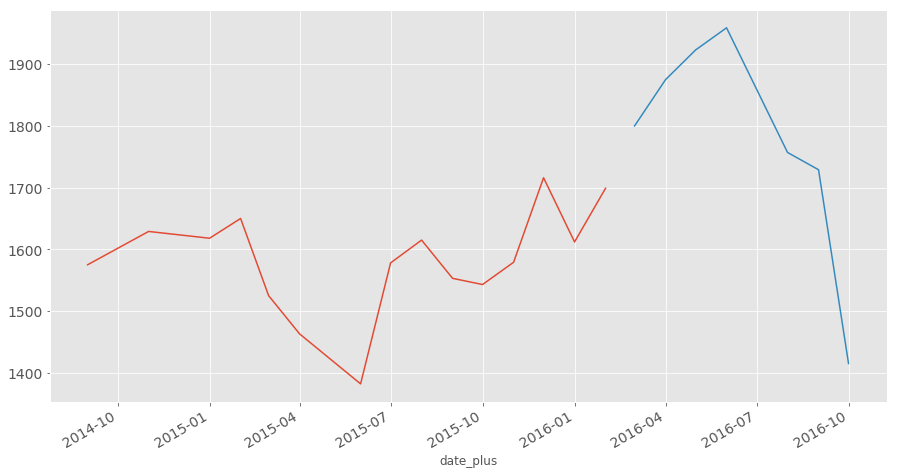

In [6]:
#Plotting data
train.modal_price.plot(figsize=(15,8), fontsize=14)
test.modal_price.plot(figsize=(15,8), fontsize=14)
plt.show()

In [7]:
train.index

DatetimeIndex(['2014-09-01', '2014-11-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01', '2015-06-01', '2015-07-01',
               '2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01', '2016-02-01'],
              dtype='datetime64[ns]', name='date_plus', freq=None)

### Naive Approach

Here, we take the last month value and estimate the same value for the next month.

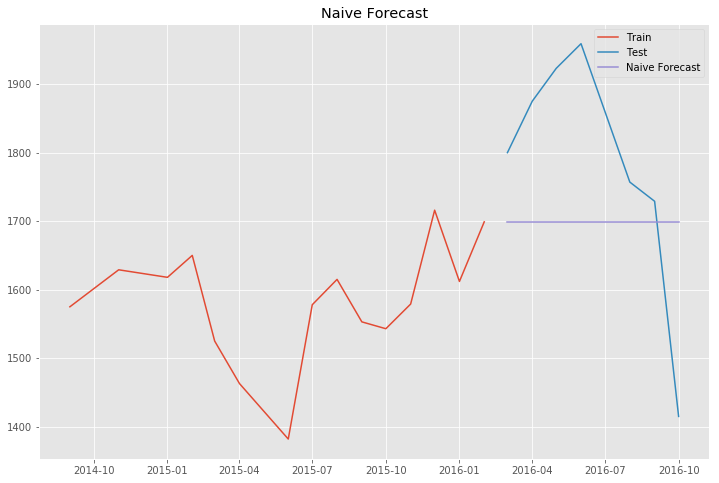

In [8]:
dd= np.asarray(train.modal_price)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['modal_price'], label='Train')
plt.plot(test.index,test['modal_price'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [9]:
rms = sqrt(mean_squared_error(test.modal_price, y_hat.naive))
print(rms)

186.65208276362736


### Simple Average approach

Here we take the average of all previously observed points to forecast for the next month

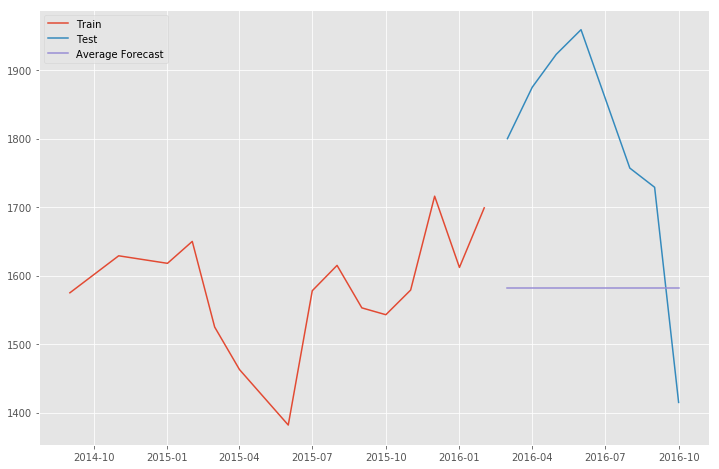

In [10]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['modal_price'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['modal_price'], label='Train')
plt.plot(test['modal_price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [11]:
rms = sqrt(mean_squared_error(test.modal_price, y_hat_avg.avg_forecast))
print(rms)

259.2890805675921


### Moving average

Here we forecast the next value based on the average of a fixed finite number ‘p’ of the previous values.

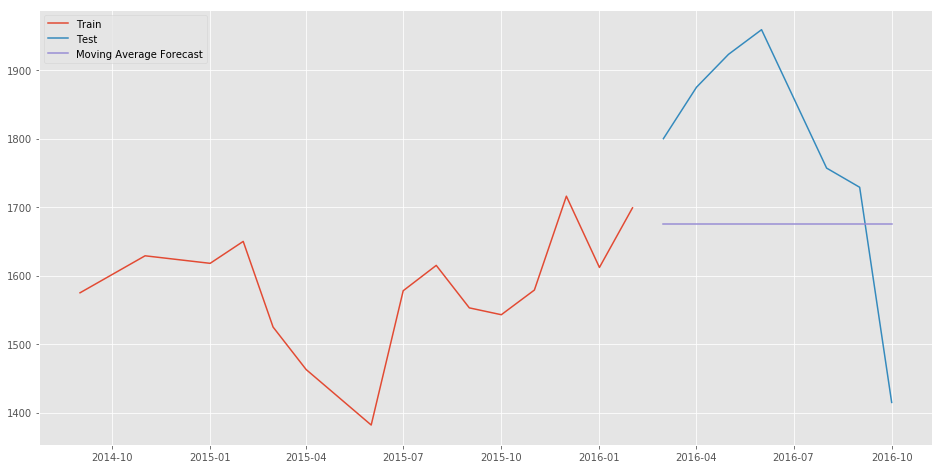

In [12]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['modal_price'].rolling(3).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['modal_price'], label='Train')
plt.plot(test['modal_price'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [13]:
rms = sqrt(mean_squared_error(test.modal_price, y_hat_avg.moving_avg_forecast))
print(rms)

197.8638701509477
